# Case 4: a field case

Import the definitions of the plot routines:

In [1]:
import plotroutines as pr
import matplotlib.pyplot as plt
plt.rc('text', usetex=False) # don't use Latex as Binder currently fails, see https://github.com/jupyterhub/binderhub/issues/1143

Choose the places and methods that should be evaluated. The names have to be consistent with the folder names in `../results`:

In [2]:
# once the Latex issue is fixed, replace "_" by "\_"
places_and_methods = {
    "UiB": ["TPFA", "MPFA", "MVEM", "RT0"],
    "USTUTT": ["MPFA", "TPFA_Circ"],
    "LANL": ["MFD"],
    "UNICE_UNIGE": ["VAG_Cont", "HFV_Cont", "VAG_Disc", "HFV_Disc"],
    "ETHZ_USI": ["FEM_LM"],
    "UNICAMP": ["Hybrid_Hdiv"],
    "DTU": ["FEM_COMSOL"]
};

Plot the hydraulic head over two *lines* by looping through all places and methods, taking the data from the files `dol_line_{0,1}.csv` in the corresponding folders. This corresponds to Figure 16 in the paper.

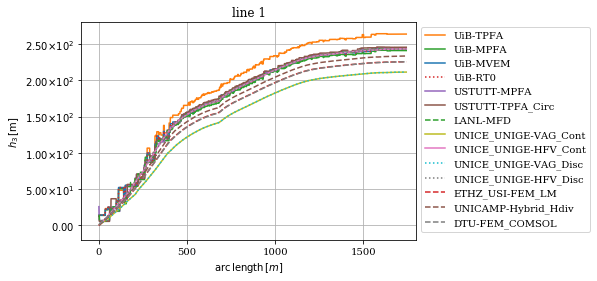

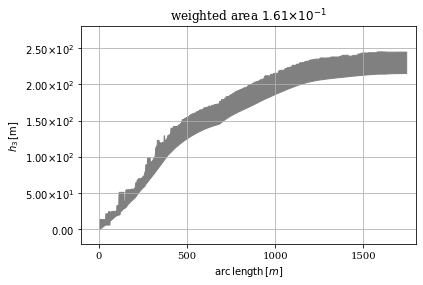

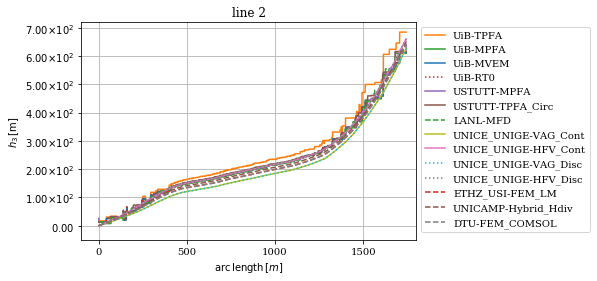

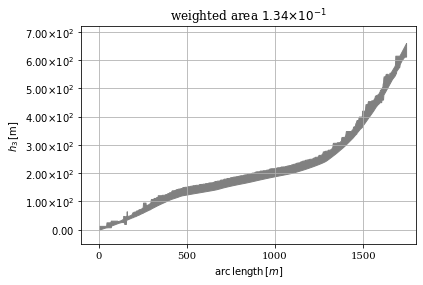

In [3]:
fig = plt.figure()
ax = fig.add_subplot(ylim=(-20, 280), xlim=(-100, 1800))
for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        label = place + "-" + method
        title = "line 1"
        data = folder.replace("\\", "") + "dol_line_1.csv"
        pr.plot_over_line(data, label, pr.id_p_1_matrix, title, ax,
                          pr.linestyle[place][method], pr.color[place][method])

fig = plt.figure()
ax = fig.add_subplot(ylim=(-20, 280), xlim=(-100, 1800))
dummy = pr.plot_percentiles("1", places_and_methods, ax)

fig = plt.figure()
ax = fig.add_subplot(ylim=(-50, 720), xlim=(-100, 1800))
for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        label = place + "-" + method
        title = "line 2"
        data = folder.replace("\\", "") + "dol_line_0.csv"
        pr.plot_over_line(data, label, pr.id_p_0_matrix, title, ax,
                          pr.linestyle[place][method], pr.color[place][method])

fig = plt.figure()
ax = fig.add_subplot(ylim=(-50, 720), xlim=(-100, 1800))
dummy = pr.plot_percentiles("0", places_and_methods, ax)

Plot the mean concentration over time in three selected fractures, taking the data from the files `dot.csv`. This corresponds to Figure 17.

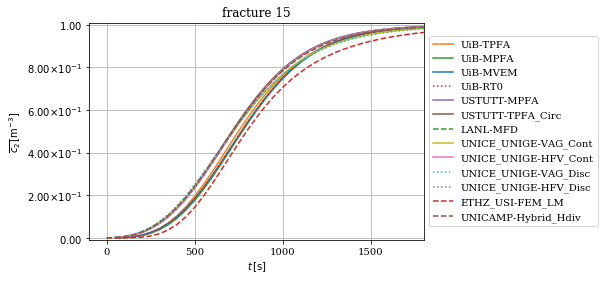

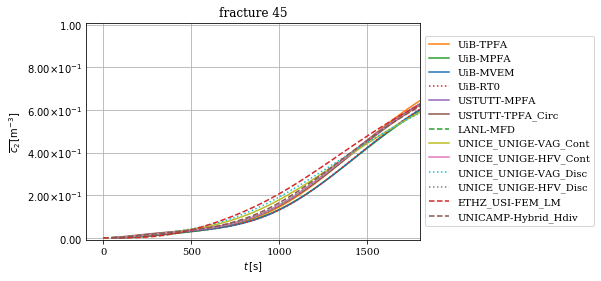

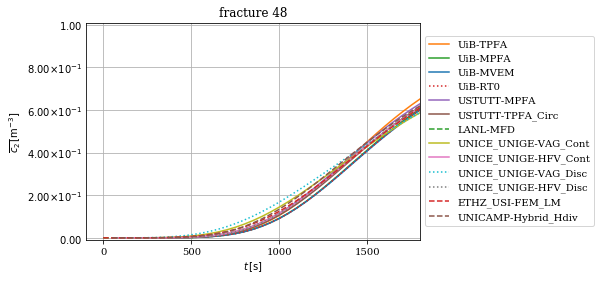

In [4]:
regions = [15, 45, 48]

# remove DTU as they didn't provide concentration results
if places_and_methods.get("DTU"):
    places_and_methods.pop("DTU")

for region_pos, region in enumerate(regions):

    title = "fracture " + str(region)
    fig = plt.figure()
    ax = fig.add_subplot(ylim=(0-0.01, 1+0.01), xlim=(-100, 1800))

    for place in places_and_methods:
        for method in places_and_methods[place]:
            folder = "../results/" + place + "/" + method + "/"
            data = folder.replace("\\", "") + "dot.csv"
            label = place + "-" + method

            pr.plot_over_time(data, label, title, pr.id_pot, region, region_pos, len(regions), ax,
                              lineStyle=pr.linestyle[place][method], clr=pr.color[place][method])
            ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))